In [1]:
#install.packages('maps')
library(maps)
library(ggplot2)

In [2]:
locs <- read.csv('/kaggle/input/leo-locs/leopards_flow_locs.csv', sep = ',', header = TRUE)
locs <- locs[-4,]
row.names(locs) <- NULL
locs

Place,Latitude,Longitude,Value
<chr>,<dbl>,<dbl>,<int>
Java,-7.360,110.420,1
Nepal,28.000,84.000,1
Namibia,-22.580,18.290,2
Tanzania Selous,-9.000,37.500,2
Zambia,-13.080,27.500,2
Tanzania Maswa,-3.240,33.975,1
Tanzania Ugalla,-5.780,31.165,1
Ghana Kananto,9.233,-2.000,1


In [3]:
locs[9,] <- c('ZOO ori', 34.27, 108.889, 1)

In [4]:
locs$Population <- c('Java', 'Nepal', 'Namibia', 'Tanzania', 'Zambia', 'Tanzania', 'Tanzania', 'Ghana', 'ZOO ori')

In [5]:
locs$Latitude <- as.numeric(locs$Latitude)
locs$Longitude <- as.numeric(locs$Longitude)
locs

,Place,Latitude,Longitude,Value,Population
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Java,-7.360,110.420,1,Java
2,Nepal,28.000,84.000,1,Nepal
3,Namibia,-22.580,18.290,2,Namibia
4,Tanzania Selous,-9.000,37.500,2,Tanzania
5,Zambia,-13.080,27.500,2,Zambia
6,Tanzania Maswa,-3.240,33.975,1,Tanzania
7,Tanzania Ugalla,-5.780,31.165,1,Tanzania
8,Ghana Kananto,9.233,-2.000,1,Ghana
9,ZOO ori,34.270,108.889,1,ZOO ori


In [6]:
world_map <- map_data("world")
p <- ggplot() + xlab("") + ylab("")

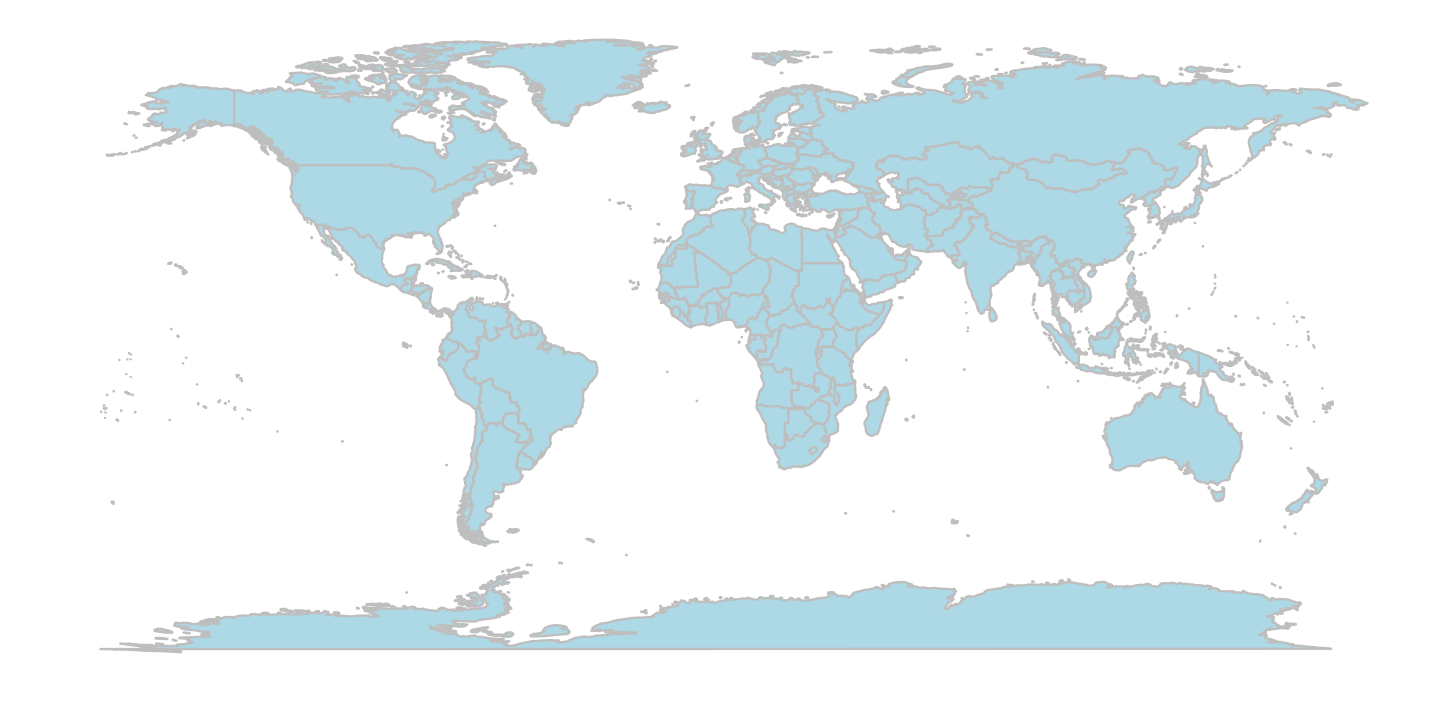

In [7]:
options(repr.plot.width=12, repr.plot.height=6) 
base_world_messy <- p + geom_polygon(data=world_map, 
                                     aes(x=long, y=lat, group=group), 
                                     colour="gray", fill="light blue")

cleanup <- 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        panel.background = element_rect(fill = 'white', colour = 'white'), 
        axis.line = element_line(colour = "white"),
        axis.ticks=element_blank(), axis.text.x=element_blank(),
        axis.text.y=element_blank())

base_world <- base_world_messy + cleanup
base_world

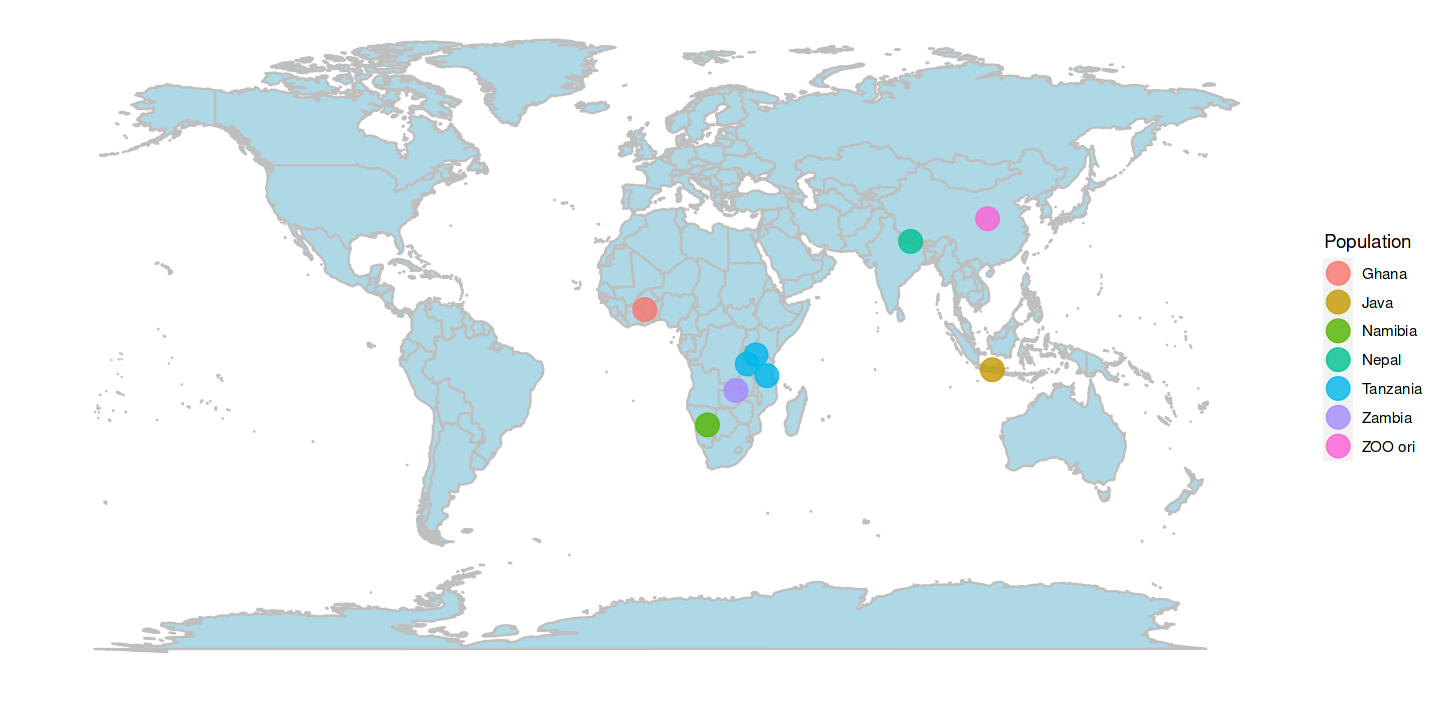

In [8]:
options(repr.plot.width=12, repr.plot.height=6) 
map <- base_world + 
geom_point(data = locs, 
           aes(x = Longitude, y = Latitude, col = Population), 
           pch = 19, size = 6, alpha = I(0.8))
map

In [9]:

#Tanzania <- subset(world_map, world_map$region=="Tanzania")

In [10]:
jpeg("map.jpg", width = 700, height = 350)
map
dev.off()

png 
  2